In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings

from nltk.corpus import stopwords
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split

In [9]:
# loading data

columns = ['id','text']

labels = ['a','b','c','d','e','f','e','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u']



# reading train text
train_data = pd.read_csv('F:/EPITA/Project_Lakshy/Data_proj/Data_proj/train.txt',sep='~',names = columns)

# reading test text
test_data = pd.read_csv('F:/EPITA/Project_Lakshy/Data_proj/Data_proj/testing.txt',sep='~',names = columns)

# print first 5 rows of train data
print(train_data.head())
print("-"*60)

# print first 5 rows of test data
print(test_data.head())
print("-"*60)


print('Number of data points in train text : ', train_data.shape[0])
print('Number of features in train text: ', train_data.shape[1])
print('Features : ', train_data.columns.values)
print("-"*60)


print('Number of data points in test text : ', test_data.shape[0])
print('Number of features in test text: ', test_data.shape[1])
print('Features : ', test_data.columns.values)
print("-"*60)


# reading labels of train data
train_labels = pd.read_csv('F:/EPITA/Project_Lakshy/solution/solution/Train.csv',header = None,names = labels)

# reading labels of test data
test_labels = pd.read_csv('F:/EPITA/Project_Lakshy/solution/solution/Test.csv',header = None,names = labels)

print("Shape of train labels : ",train_labels.shape)
print("Shape of test labels : ",test_labels.shape)

train_labels.head()

   id                                               text
0   1  locate _ distancemeasuringequipment FROM runwa...
1   2  IN _ I BECAME AWARE THAT MY ULTRASONIC AND EDD...
2   3  visualflightrules FROM feet PIERCE flightlevel...
3   4  JUST PRIOR TO rotate A DEER RAN ONTO THE runwa...
4   5  climb ON _ degree head TO _ feet GOT traffical...
------------------------------------------------------------
   id                                               text
0   1  AFTER takeoff ON runway _ A loudnoise WAS hear...
1   2  taxi OFF THE parkingramp THE brake system fail...
2   3  airworthinessdirective _ DUE EACH _ hour TO GR...
3   4  ON descend clear TO _ feet.captain SET _ feet ...
4   5  AN UNUSUAL ODOR WAS note IN THE COCKPIT BY fli...
------------------------------------------------------------
Number of data points in train text :  21519
Number of features in train text:  2
Features :  ['id' 'text']
------------------------------------------------------------
Number of data points in 

,a,b,c,d,e,f,e.1,g,h,i,...,l,m,n,o,p,q,r,s,t,u
0,-1,1,-1,-1,-1,1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
2,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,-1,1,-1
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,-1,-1
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [10]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def preprocess(total_text):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', str(total_text))
        # replace multiple spaces with single space
        #total_text = re.sub('\s+',' ', str(total_text))
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        return string

# Cleaning the text Data

In [11]:
cleaned_train = []
cleaned_test = []

# preprocess the train text
for sent in train_data['text'].values:
    temp = preprocess(sent)
    cleaned_train.append(temp)

# add preprocessed the data to train dataframe
train_data['cleaned_text'] = cleaned_train

# preprocess the test text
for sent in test_data['text'].values:
    temp = preprocess(sent)
    cleaned_test.append(temp)

# add preprocessed the data to test dataframe
test_data['cleaned_text'] = cleaned_test

# Displaying data after Clean up

In [12]:
# check if we preprocessed properly or not
train_data.head()

,id,text,cleaned_text
0,1,locate _ distancemeasuringequipment FROM runwa...,locate distancemeasuringequipment runway locat...
1,2,IN _ I BECAME AWARE THAT MY ULTRASONIC AND EDD...,became aware ultrasonic eddy current inspect q...
2,3,visualflightrules FROM feet PIERCE flightlevel...,visualflightrules feet pierce flightlevel habe...
3,4,JUST PRIOR TO rotate A DEER RAN ONTO THE runwa...,prior rotate deer ran onto runway rotate hear ...
4,5,climb ON _ degree head TO _ feet GOT traffical...,climb degree head feet got trafficalertandcoll...


In [13]:
train_data.shape

(21519, 3)

In [14]:
test_data.head()

,id,text,cleaned_text
0,1,AFTER takeoff ON runway _ A loudnoise WAS hear...,takeoff runway loudnoise hear come front area ...
1,2,taxi OFF THE parkingramp THE brake system fail...,taxi parkingramp brake system fail stop aircra...
2,3,airworthinessdirective _ DUE EACH _ hour TO GR...,airworthinessdirective due hour grease blower ...
3,4,ON descend clear TO _ feet.captain SET _ feet ...,descend clear feet captain set feet alert read...
4,5,AN UNUSUAL ODOR WAS note IN THE COCKPIT BY fli...,unusual odor note cockpit flightcrew minute la...


In [15]:
test_data.shape

(7077, 3)

In [16]:
# from sklearn import cross_validation

# # Split data in train and cross validatio data set 

# X_train,X_cv,y_train,y_cv = cross_validation.train_test_split(train_data,train_labels, test_size=0.2, random_state=0)


# print("Shape of train_data and train_labels : ",(train_data.shape,train_labels.shape))

# print("Shape of X_train and y_train:  ",(X_train.shape,y_train.shape))

# print("Shape of X_test and y_test:  ",(X_cv.shape,y_cv.shape))

# print(X_train.columns)

# print(type(y_train))

# print(len(y_train['a']))

# Vectorization: Converting each row text into Vectors containing word Count

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the countvectorizer object
cv_model = CountVectorizer()

# bow_train = cv_model.fit_transform(X_train['cleaned_text'])

# bow_cv = cv_model.transform(X_cv['cleaned_text'])

# bow_test = cv_model.transform(test_data['cleaned_text'])


# print shape of each vectorizer. dimensions should be same

# print("Shape of train : ",bow_train.get_shape())

# print("Shape of cv : ",bow_cv.get_shape())

# print("Shape of test : ",bow_test.get_shape())


bow_train = cv_model.fit_transform(train_data['cleaned_text'])
bow_test = cv_model.transform(test_data['cleaned_text'])


print("Shape of train : ",bow_train.get_shape())

print("Shape of test : ",bow_test.get_shape())

Shape of train :  (21519, 25406)
Shape of test :  (7077, 25406)


# Multinomial Naive Bayes

In [24]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score

pred_list = []

clf = MultinomialNB()

avr=0
for c in labels:
    clf.fit(bow_train,train_labels[c])
    pred = clf.predict(bow_test)
    pred_list.append(pred)
    # evaluate accuracy
    acc = accuracy_score(test_labels[c], pred) * 100
    print('\nThe accuracy of the MultinomialNB for label = %c is %f%%' % (c, acc))
    avr+=acc
    
MN_avd=avr/22
print('\nthe average accuracy score is',avd)
    
    
# clf.fit(bow_train, y)


The accuracy of the MultinomialNB for label = a is 92.807687%

The accuracy of the MultinomialNB for label = b is 66.850360%

The accuracy of the MultinomialNB for label = c is 98.544581%

The accuracy of the MultinomialNB for label = d is 96.594602%

The accuracy of the MultinomialNB for label = e is 91.762046%

The accuracy of the MultinomialNB for label = f is 74.155716%

The accuracy of the MultinomialNB for label = e is 91.762046%

The accuracy of the MultinomialNB for label = g is 83.679525%

The accuracy of the MultinomialNB for label = h is 97.400028%

The accuracy of the MultinomialNB for label = i is 90.702275%

The accuracy of the MultinomialNB for label = j is 98.318497%

The accuracy of the MultinomialNB for label = k is 82.888229%

The accuracy of the MultinomialNB for label = l is 86.208846%

The accuracy of the MultinomialNB for label = m is 94.757666%

The accuracy of the MultinomialNB for label = n is 96.651123%

The accuracy of the MultinomialNB for label = o is 89.

# Bernoulli Naive Bayes

In [27]:
from sklearn.naive_bayes import BernoulliNB



pred_list = []

clf = BernoulliNB()


avr=0
for c in labels:
    clf.fit(bow_train,train_labels[c])
    pred = clf.predict(bow_test)
    pred_list.append(pred)
    # evaluate accuracy
    acc = accuracy_score(test_labels[c], pred) * 100
    print('\nThe accuracy of the BernoulliNB for label = %c is %f%%' % (c, acc))
    avr+=acc
    
BN_avd=avr/22
print('\nthe average accuracy score is',avd)
# clf.fit(bow_train, y)


The accuracy of the BernoulliNB for label = a is 94.785926%

The accuracy of the BernoulliNB for label = b is 65.564505%

The accuracy of the BernoulliNB for label = c is 96.976120%

The accuracy of the BernoulliNB for label = d is 96.891338%

The accuracy of the BernoulliNB for label = e is 92.977250%

The accuracy of the BernoulliNB for label = f is 75.300268%

The accuracy of the BernoulliNB for label = e is 92.977250%

The accuracy of the BernoulliNB for label = g is 85.996891%

The accuracy of the BernoulliNB for label = h is 97.258725%

The accuracy of the BernoulliNB for label = i is 91.295747%

The accuracy of the BernoulliNB for label = j is 97.244595%

The accuracy of the BernoulliNB for label = k is 86.957750%

The accuracy of the BernoulliNB for label = l is 85.700155%

The accuracy of the BernoulliNB for label = m is 95.026141%

The accuracy of the BernoulliNB for label = n is 96.679384%

The accuracy of the BernoulliNB for label = o is 92.807687%

The accuracy of the Ber

# Logistic Regression Model

In [20]:
from sklearn import linear_model

# l1 penalty is multinomial hyperparameter used to tune the model for time optimization
LR_clf = linear_model.LogisticRegression(penalty = 'l1')

avr=0

for c in labels:
    # fit the training dataset
    LR_clf.fit(bow_train,train_labels[c])
    #perform prediction on test dataset
    pred = LR_clf.predict(bow_test)
    # evaluate accuracy
    acc = accuracy_score(test_labels[c], pred) * 100
    print('\nThe accuracy of the Logistic Regression for label = %c is %f%%' % (c, acc))
    avr+=acc
#Average accuracy of Logistic Regression is calculated by adding all the column and deviding by total no. of columns
LR_avd=avr/22
print('\nthe average accuracy score of the Logistic Regression is',LR_avd)    


The accuracy of the Logistic Regression for label = a is 95.407659%

The accuracy of the Logistic Regression for label = b is 63.967783%

The accuracy of the Logistic Regression for label = c is 98.643493%

The accuracy of the Logistic Regression for label = d is 97.696764%

The accuracy of the Logistic Regression for label = e is 93.189204%

The accuracy of the Logistic Regression for label = f is 80.274127%

The accuracy of the Logistic Regression for label = e is 93.189204%

The accuracy of the Logistic Regression for label = g is 92.058782%

The accuracy of the Logistic Regression for label = h is 97.866328%

The accuracy of the Logistic Regression for label = i is 94.065282%

The accuracy of the Logistic Regression for label = j is 98.360887%

The accuracy of the Logistic Regression for label = k is 91.719655%

The accuracy of the Logistic Regression for label = l is 90.462060%

The accuracy of the Logistic Regression for label = m is 96.396778%

The accuracy of the Logistic Regr

# Decision Tree Classifier

In [21]:
from sklearn import tree


# max_depth is a hyperparameter used to tune the model for time optimization
DT_clf = tree.DecisionTreeClassifier(max_depth=2)

avr=0
for c in labels:
    # fit the training dataset
    DT_clf.fit(bow_train,train_labels[c])
    #perform prediction on test dataset
    pred = DT_clf.predict(bow_test)
    # evaluate accuracy
    acc = accuracy_score(test_labels[c], pred) * 100
    print('\nThe accuracy of the Decision Tree for label = %c is %f%%' % (c, acc))
    avr+=acc
    
#Average accuracy of Decidion tree is calculated by adding all the column and deviding by total no. of columns        
DT_avd=avr/22
print('\nthe average accuracy score of the Decision Tree is',DT_avd)


The accuracy of the Decision Tree for label = a is 94.489190%

The accuracy of the Decision Tree for label = b is 53.892892%

The accuracy of the Decision Tree for label = c is 98.134803%

The accuracy of the Decision Tree for label = d is 97.555461%

The accuracy of the Decision Tree for label = e is 90.462060%

The accuracy of the Decision Tree for label = f is 76.133955%

The accuracy of the Decision Tree for label = e is 90.462060%

The accuracy of the Decision Tree for label = g is 90.447930%

The accuracy of the Decision Tree for label = h is 97.626113%

The accuracy of the Decision Tree for label = i is 95.012011%

The accuracy of the Decision Tree for label = j is 98.516320%

The accuracy of the Decision Tree for label = k is 89.642504%

The accuracy of the Decision Tree for label = l is 90.433800%

The accuracy of the Decision Tree for label = m is 95.351137%

The accuracy of the Decision Tree for label = n is 97.371768%

The accuracy of the Decision Tree for label = o is 95.

# Random Forest Model

In [22]:
from sklearn.ensemble import RandomForestClassifier


# max_depth is a hyperparameter used to tune the model for time optimization
RF_clf = RandomForestClassifier(max_depth=2)

avr=0

for c in labels:
    # fit the training dataset
    RF_clf.fit(bow_train,train_labels[c])
    #perform prediction on test dataset
    pred = RF_clf.predict(bow_test)
    # evaluate accuracy
    acc = accuracy_score(test_labels[c], pred) * 100
    print('\nThe accuracy of the Random Forest for label = %c is %f%%' % (c, acc))
    avr+=acc
#Average accuracy of Random Forest is calculated by adding all the column and deviding by total no. of columns    
RF_avd=avr/22
print('\nthe average accuracy score of the Random Forest is',RF_avd)    


The accuracy of the Random Forest for label = a is 93.853328%

The accuracy of the Random Forest for label = b is 46.587537%

The accuracy of the Random Forest for label = c is 96.863078%

The accuracy of the Random Forest for label = d is 97.428289%

The accuracy of the Random Forest for label = e is 87.946870%

The accuracy of the Random Forest for label = f is 77.419811%

The accuracy of the Random Forest for label = e is 87.946870%

The accuracy of the Random Forest for label = g is 91.083793%

The accuracy of the Random Forest for label = h is 97.626113%

The accuracy of the Random Forest for label = i is 95.068532%

The accuracy of the Random Forest for label = j is 97.725025%

The accuracy of the Random Forest for label = k is 87.028402%

The accuracy of the Random Forest for label = l is 90.292497%

The accuracy of the Random Forest for label = m is 94.446799%

The accuracy of the Random Forest for label = n is 97.414159%

The accuracy of the Random Forest for label = o is 95.

# Evaluation

Comparision of model and choosing the appropriate one

In [28]:
print('\n WE chose the model with highest average accuracy\n')    
print('\nThe average accuracy score of the MultinomialNB  is',MN_avd)
print('\nThe average accuracy score of the BernoulliNB  is',BN_avd)
print('\nThe average accuracy score of the Decision Tree is',DT_avd)
print('\nThe average accuracy score of the Logistic Regression is',LR_avd)   
print('\nThe average accuracy score of the Random Forest is',RF_avd)    


 WE chose the model with highest average accuracy


The average accuracy score of the MultinomialNB  is 90.65667270415044

The average accuracy score of the BernoulliNB  is 91.47879815535603

The average accuracy score of the Decision Tree is 91.36382904928897

The average accuracy score of the Logistic Regression is 93.17250504194122

The average accuracy score of the Random Forest is 90.62327385769521


# ROC Curve

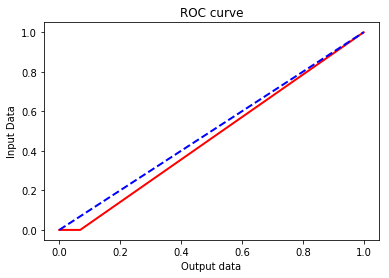

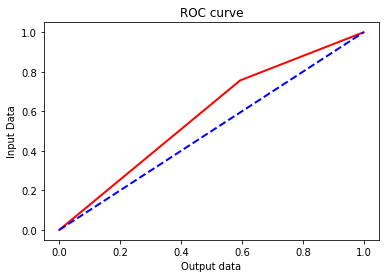

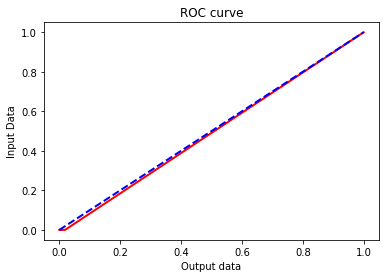

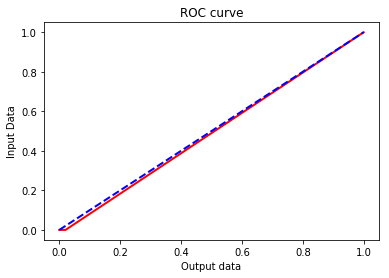

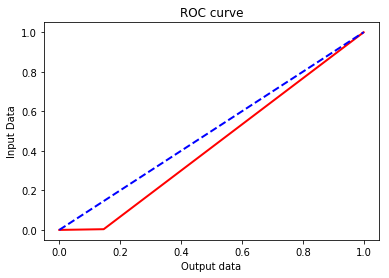

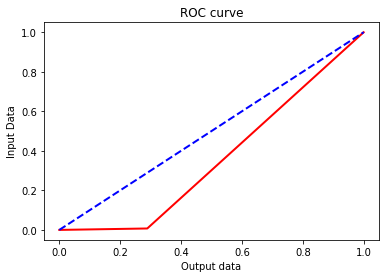

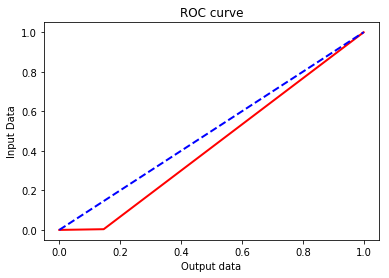

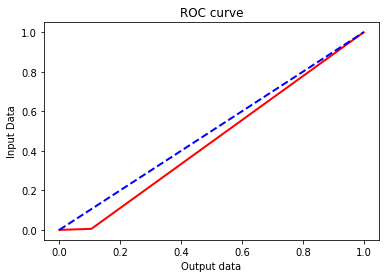

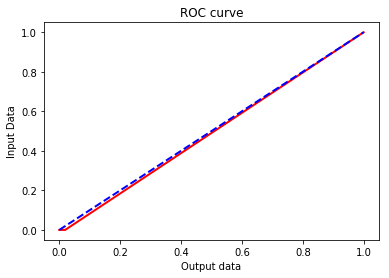

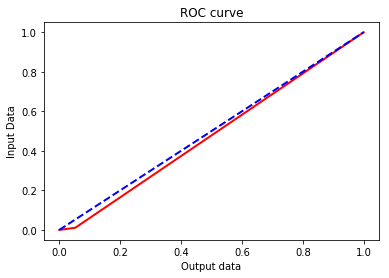

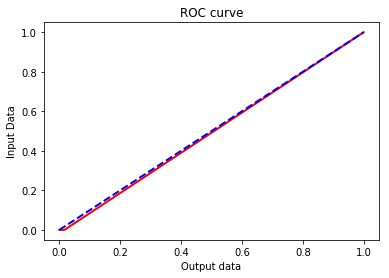

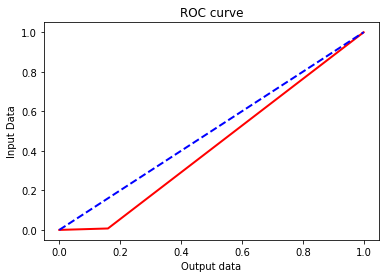

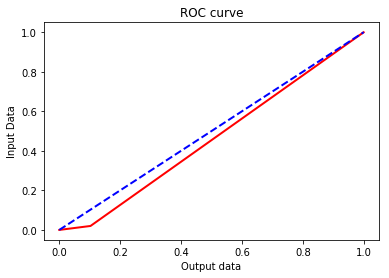

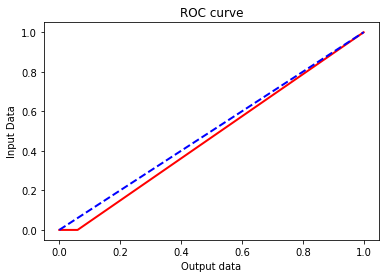

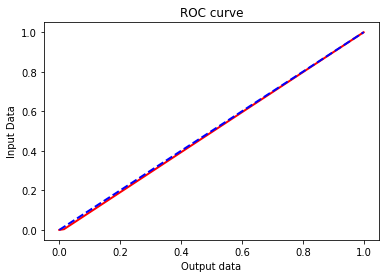

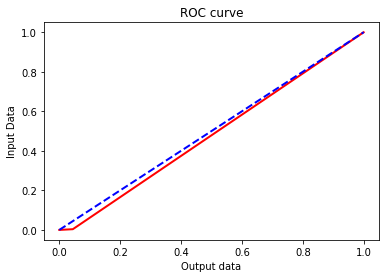

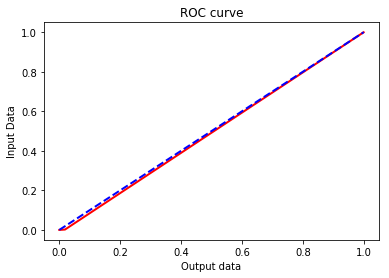

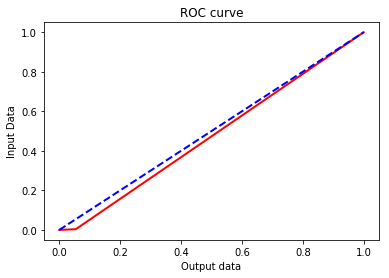

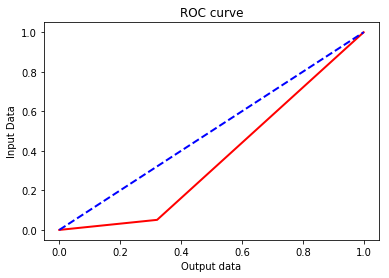

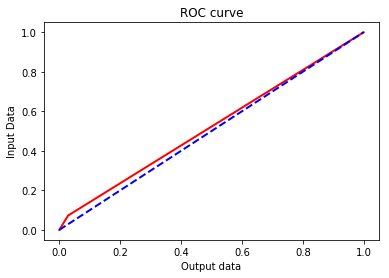

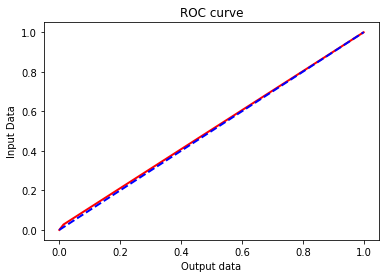

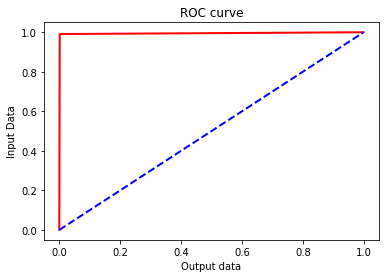

In [29]:
# Here we have taken Logistic Regression as it gives highest Average Accuracy score
from sklearn.metrics import roc_curve
for c in labels:
    fpr, tpr,_=roc_curve(LR_clf.predict(bow_train),train_labels[c],drop_intermediate=False)
    plt.figure()
    ##Adding the ROC
    plt.plot(fpr, tpr, color='red', lw=2, label=train_labels[c])
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    plt.xlabel('Output data')
    plt.ylabel('Input Data')
    plt.title('ROC curve')
    plt.show()